In [36]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn


In [37]:
X_train = np.arange(10, dtype=np.float64).reshape((10, 1))
y_train = np.array(
    [1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0], dtype=np.float64
)

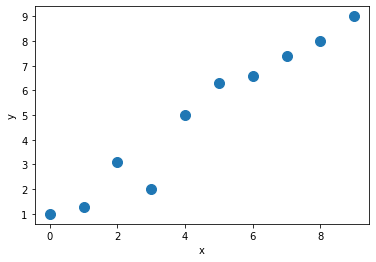

In [38]:
plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:

# standardaze the features (mean centering and dividing by standard deviation)
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [17]:
# define a model for linear regression, z = wx + b
torch.manual_seed(1)
weight = torch.randn(1).double() # weight of neural network
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True) # bias of neural network
def model(xb):
    return xb @ weight + bias

In [18]:
# define the loss function that we want to minimize, using mean squared error (MSE) metric
def loss_fn(input, target):
    return (input-target).pow(2).mean()

In [19]:
# implement training via stochastic gradient descent (SGD)
# this method is typically available in torch.optim module
learning_rate = 0.001
num_epochs = 200
log_epochs = 10
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad * learning_rate
        bias -= bias.grad * learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f"Epoch {epoch} | Loss {loss.item():.4f}")

Epoch 0 | Loss 46.5720
Epoch 10 | Loss 27.1502
Epoch 20 | Loss 1.6446
Epoch 30 | Loss 14.4571
Epoch 40 | Loss 11.7827
Epoch 50 | Loss 6.4122
Epoch 60 | Loss 0.6339
Epoch 70 | Loss 3.1562
Epoch 80 | Loss 2.0100
Epoch 90 | Loss 0.3107
Epoch 100 | Loss 0.7625
Epoch 110 | Loss 1.0024
Epoch 120 | Loss 0.0232
Epoch 130 | Loss 0.5138
Epoch 140 | Loss 0.0741
Epoch 150 | Loss 1.8712
Epoch 160 | Loss 0.0007
Epoch 170 | Loss 0.0850
Epoch 180 | Loss 0.0634
Epoch 190 | Loss 0.0012


In [20]:
print('Final Parameters: ', weight.item(), bias.item())

Final Parameters:  2.6709304310884425 4.88258695602417


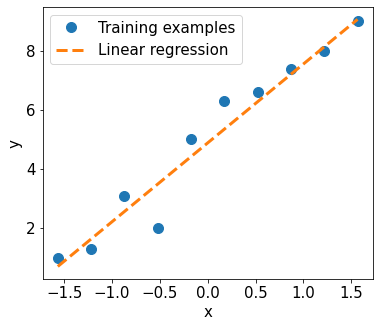

In [21]:
# for the test data, create numpy array of values evently spaced between 0 and 9
# since training model contains standardized features, apply the same standardization to test data
X_test = np.linspace(0, 9, num=100, dtype=np.float64).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear regression'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()



In [41]:
# model training via the torch.nn and torch.optim modules
loss_fn = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size, dtype=torch.double)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [43]:
# train the model
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]         # generate predictions
        loss = loss_fn(pred, y_batch)       # calculate loss
        loss.backward()                     # compute gradients
        optimizer.step()                    # update parameters using gradients
        optimizer.zero_grad()               # reset the gradients to zero
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} | Loss {loss.item():.4f}')

Epoch 0 | Loss 0.2937
Epoch 10 | Loss 0.0113
Epoch 20 | Loss 0.1185
Epoch 30 | Loss 0.1223
Epoch 40 | Loss 2.3451
Epoch 50 | Loss 0.0271
Epoch 60 | Loss 0.0114
Epoch 70 | Loss 0.2510
Epoch 80 | Loss 0.0604
Epoch 90 | Loss 0.1343
Epoch 100 | Loss 0.0644
Epoch 110 | Loss 2.4123
Epoch 120 | Loss 0.0510
Epoch 130 | Loss 0.0757
Epoch 140 | Loss 0.2568
Epoch 150 | Loss 0.0696
Epoch 160 | Loss 2.4268
Epoch 170 | Loss 0.0707
Epoch 180 | Loss 0.2392
Epoch 190 | Loss 0.0713


In [44]:
print('Final Parameters: ', model.weight.item(), model.bias.item())

Final Parameters:  2.7062088912409648 4.968390048683275


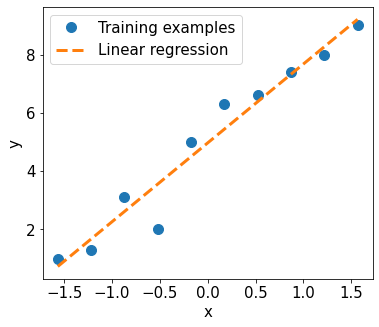

In [45]:
X_test = np.linspace(0, 9, num=100, dtype=np.float64).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear regression'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()